In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

def price_quartiles_transform(y_train, y_test=None):
    # calculate the quartiles on y_train
    # appyl to both y_train and y_test

    def update(y, q25_, q50_, q75_, q100_):
        q100_idx = y.loc[y <= q100_].index
        q75_idx = y.loc[y <= q75_].index
        q50_idx = y.loc[y <= q50_].index
        q25_idx = y.loc[y <= q25_].index

        # y.loc[q100_idx] = 'high'
        # y.loc[q75_idx] = 'mid_high'
        # y.loc[q50_idx] = 'mid_low'
        # y.loc[q25_idx] = 'low'
        y.loc[q100_idx] = 1
        y.loc[q75_idx] = 0.75
        y.loc[q50_idx] = 0.5
        y.loc[q25_idx] = 0.25

    q25 = np.percentile(y_train, 25)
    q50 = np.percentile(y_train, 50)
    q75 = np.percentile(y_train, 75)
    q100 = np.percentile(y_train, 100)

    update(y_train, q25, q50, q75, q100)
    print("\ny_train value counts:")
    print(y_train.value_counts())


    if y_test != None:
        update(y_test, q25, q50, q75, q100)
        print("\ny_test value counts:")
        print(y_test.value_counts())

    



In [2]:
data = pd.read_csv('data_transformed.csv')
X_all, y_all = data.drop('price', axis=1).copy(), data['price'].copy()

price_quartiles_transform(y_all)

X_all['price'] = y_all


y_train value counts:
0.50    7022
0.25    6787
1.00    6181
0.75    4778
Name: price, dtype: int64


In [3]:
# titanic - Analyze by pivoting features
X_all[["contentRating", "price"]].groupby(['contentRating'], as_index=False).mean().sort_values(by='price', ascending=False)

,contentRating,price
1,Everyone 10+,0.666748
2,Mature 17+,0.623457
3,Teen,0.614332
0,Everyone,0.600509
4,Unrated,0.525862


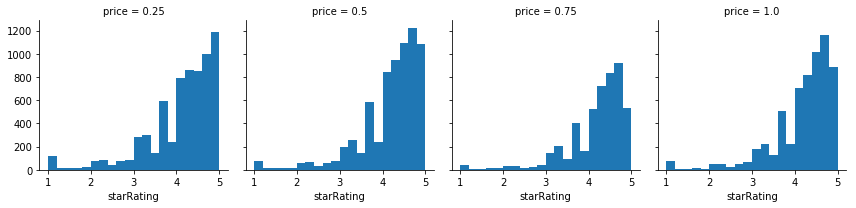

In [4]:
# Analyze by visualizing data


g = sns.FacetGrid(X_all, col='price')
g.map(plt.hist, 'starRating', bins=20)

In [5]:
data.installs.isnull()

data.installs.describe()

data.loc[data['installs'].isnull(),:]

data['installs'].describe().loc['top']

data.installs.unique()

data.installs.describe()

data.installs.value_counts()

100 - 500            6136
1,000 - 5,000        5850
500 - 1,000          2844
10,000 - 50,000      2745
5,000 - 10,000       1943
10 - 50              1901
50 - 100             1686
50,000 - 100,000      609
100,000 - 500,000     527
1 - 5                 209
5 - 10                195
500,000+              123
Name: installs, dtype: int64